# Homework 6
## Statistical Analysis with Python

## Part 1

In this assignment we will create two main functions: **getTtestPvalue** and **getLogRatio**

The inputs of the functions will be 

- 1) Values from one gene
- 2) Labels for the Values that assign the values to the different groups

For example, the values below are from two groups, `a` and `b`. The first two values below to `a` and the last two belong to `b`.

```
values = [1,2,3,4]
groups = ['a','a','b','b']
```

The output of the **getTtestPvalue** function will provide simply the p-value.
The output of the **getLogRatio** function will provide the log2 of the fold change of the second group divided by the first group. In the example below it would be `b/a`.



### 1. Load **expvalues.txt** load it into your environment and call it **expvalues**.


In [5]:
import pandas as pd
expvalues = pd.read_csv("expvalues.txt", sep=" ")
expvalues.head()

,Control1,Control2,Control3,Treatment1,Treatment2,Treatment3
244901_at,229.985654,353.599489,178.491707,112.908004,152.918347,320.832347
244902_at,171.149796,84.450942,41.371951,170.172616,134.408135,193.526115
244903_at,314.977684,373.312500,52.908731,196.302559,237.515204,253.377736
244904_at,24.043665,175.316045,94.684235,82.784879,18.436387,87.008573
244905_at,15.869235,40.041248,58.765734,341.353405,16.801354,68.942039


### 2. In this file the first three values are from a *control* experiment and the last three are from *treatment* experiment. Create a list that contains this information

In [6]:
factor = ["Control","Control","Control","Treatment","Treatment","Treatment"]
factor

['Control', 'Control', 'Control', 'Treatment', 'Treatment', 'Treatment']

### 3a. Provide the code for function **getTtestPvalue** in the cell below.

In [7]:
def getTtestPvalue(control_vals,trt_vals):
    from scipy.stats import ttest_ind
    tstat, pvalue = ttest_ind(control_vals,trt_vals)
    return(pvalue)

### 3b. Execute the function on each row of **expvalues** and save all the pvalues in **ttestpvalues**.

In [8]:
from scipy.stats import ttest_ind
ttestpvalues = []
for rows in expvalues.iterrows():
   c_vals = rows[1][0:3]
   t_vals = rows[1][3:6]
   pvalue = getTtestPvalue(c_vals,t_vals)
   ttestpvalues.append(pvalue)

ttestpvalues

[0.5161536465998098,
 0.18445628572917247,
 0.8658765766816202,
 0.5115301737648241,
 0.36240928233770214,
 0.280369838268712,
 0.7513646459341939,
 0.5895432108842638,
 0.7875359802783938,
 0.27219642782464465,
 0.6510401324292445,
 0.9140794600644173,
 0.003656787299020637,
 0.4752347826657845,
 0.6698836335415557,
 0.3879131802695455,
 0.23474138506287004,
 0.5816184955074215,
 0.7686618178768968,
 0.9408690107504338,
 0.26931531185659874,
 0.894322720971379,
 0.8216426338922026,
 0.5086804500017889,
 0.03227870006454174,
 0.7759993653453101,
 0.6864803193535793,
 0.6392035859011236,
 0.9294298991072599,
 0.47037575960065625,
 0.5038972667224639,
 0.19886830928681531,
 0.5248364648525289,
 0.9726684266575305,
 0.3338659128162414,
 0.8120822459187308,
 0.30257284250181776,
 0.9005215100685744,
 0.5083123257580171,
 0.8305914636191964,
 0.36777988448109455,
 0.1675403218872056,
 0.05251446003003189,
 0.9142497356890836,
 0.45438244244418713,
 0.7439563481108271,
 0.24325466865062922,


### 4a. Provide the code for function **getLogRatio** in the cell below.

In [9]:
def getLogRatio(A, B):
    import numpy as np
    # calculate the log ratio of A to B
    logRatio = np.log2(B/A)
    return(logRatio)

In [ ]:
import numpy as np
for rows in expvalues.iterrows():
    print(np.log2(rows[1][3:6]/rows[1][0:3]))


### 4b. Execute the function on each row of **expvalues** and save all the log fold change in **lfc**.

In [10]:
# initialize an empty list to store the log fold changes
lfc = []

# loop through each row in expvalues
for rows in expvalues.iterrows():
   c_vals = rows[1][0:3]
   t_vals = rows[1][3:6]
   logratio = getLogRatio(c_vals,t_vals)
   lfc.append(logratio)

lfc 

[Control1     NaN
 Control2     NaN
 Control3     NaN
 Treatment1   NaN
 Treatment2   NaN
 Treatment3   NaN
 Name: 244901_at, dtype: float64,
 Control1     NaN
 Control2     NaN
 Control3     NaN
 Treatment1   NaN
 Treatment2   NaN
 Treatment3   NaN
 Name: 244902_at, dtype: float64,
 Control1     NaN
 Control2     NaN
 Control3     NaN
 Treatment1   NaN
 Treatment2   NaN
 Treatment3   NaN
 Name: 244903_at, dtype: float64,
 Control1     NaN
 Control2     NaN
 Control3     NaN
 Treatment1   NaN
 Treatment2   NaN
 Treatment3   NaN
 Name: 244904_at, dtype: float64,
 Control1     NaN
 Control2     NaN
 Control3     NaN
 Treatment1   NaN
 Treatment2   NaN
 Treatment3   NaN
 Name: 244905_at, dtype: float64,
 Control1     NaN
 Control2     NaN
 Control3     NaN
 Treatment1   NaN
 Treatment2   NaN
 Treatment3   NaN
 Name: 244906_at, dtype: float64,
 Control1     NaN
 Control2     NaN
 Control3     NaN
 Treatment1   NaN
 Treatment2   NaN
 Treatment3   NaN
 Name: 244907_at, dtype: float64,
 Contr

### 5. Use  **statsmodels.stats.multitest.fdrcorrection** to correct for multiple hypothesis testing and save the adjusted p-values as **padj**. You will have to look at the documentation of the function and learn how to use it.

In [11]:
from statsmodels.stats.multitest import fdrcorrection as fdr
padj = fdr(pvals=ttestpvalues,method="i")

## Part 2: Clustering

### 6. Another file, called **random_genes.txt**, contains 616 gene ids. Create a new dataframe which is a subset of **expvalues** containing just the values for the 616 genes in the list. Call it **random_values**.

In [19]:
import pandas as pd
random_genes = pd.read_csv("random_genes.txt",header=None)
random_genes.head()

,0
0,245112_at
1,245117_at
2,245126_at
3,245139_at
4,245148_at


In [54]:
random_values = expvalues.loc[random_genes[0]]


### 7. Perform a pairwise pearson correlation for all genes in **random_values**. Save this as **random_values_cor**

In [55]:
random_values_cor = np.corrcoef(random_values)

### 8. Perform a hierarchical clustering using the **scipy.cluster.hierachy**. Ask for 2 groups. How many genes in each group?

/var/folders/j7/9_rj6z3d0lb_bf3zmvnw7t_h0000gn/T/ipykernel_87745/66681006.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zcor = hc.linkage(expdist, 'average')


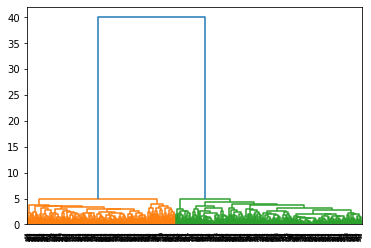

In [59]:
import scipy.cluster.hierarchy as hc
expdist = 1 - random_values_cor
Zcor = hc.linkage(expdist, 'average')

dZcor = hc.dendrogram(Zcor)
groups = hc.cut_tree(Zcor, n_clusters=2)

In [61]:
group0 = random_values[groups==0]
group1 = random_values[groups==1]

In [63]:
group0.shape

(274, 6)

In [64]:
group1.shape

(342, 6)

There are 274 genes in group 1 and 342 genes in group 2

### 9. Perform K-means clustering using **scipy.cluster.vq.kmeans**. Check out the documentation here: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html#scipy.cluster.vq.kmeans](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html#scipy.cluster.vq.kmeans)

Use K = 2. How many genes are there in each group?

In [74]:
from scipy.cluster.vq import vq, kmeans2, whiten

In [79]:
centroid, label = kmeans2(random_values, 2)
counts = np.bincount(label)
counts


array([547,  69])

Group 1 has 547 genes whereas group 2 has only 69 genes

### 10. Compare the clusters from hierarchical clustering with kmeans clustering by counting the number of genes they share. Are the results the same or different?

The results are very different to each other because, heirarchical clustering uses correlation distance whereas kmeans uses euclidean distance to a centroid. In this case heirarchical clustering resulted in equally divided groups with 274 and 342 genes respectively whereas kmeans resulted in 1 huge grooup and one small group with 547 and 69 genes respectively.